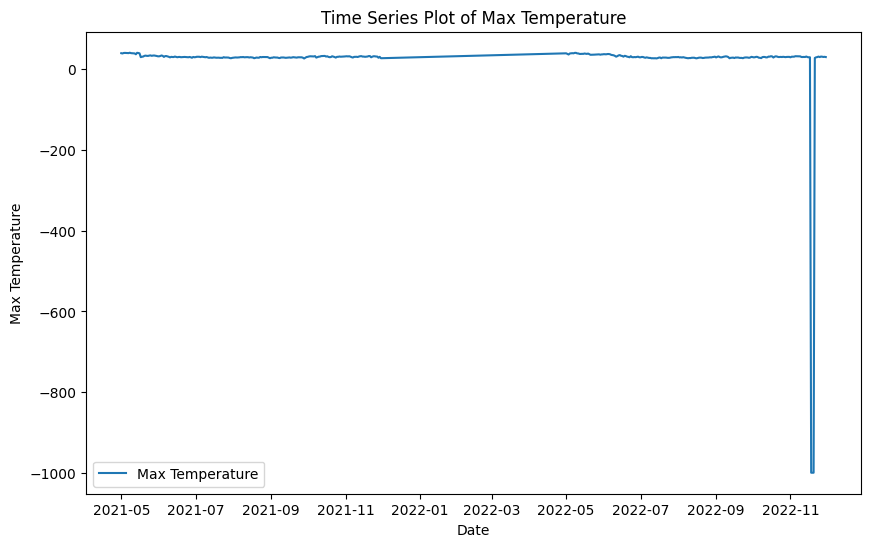

Mean Squared Error: 186.33035804988526


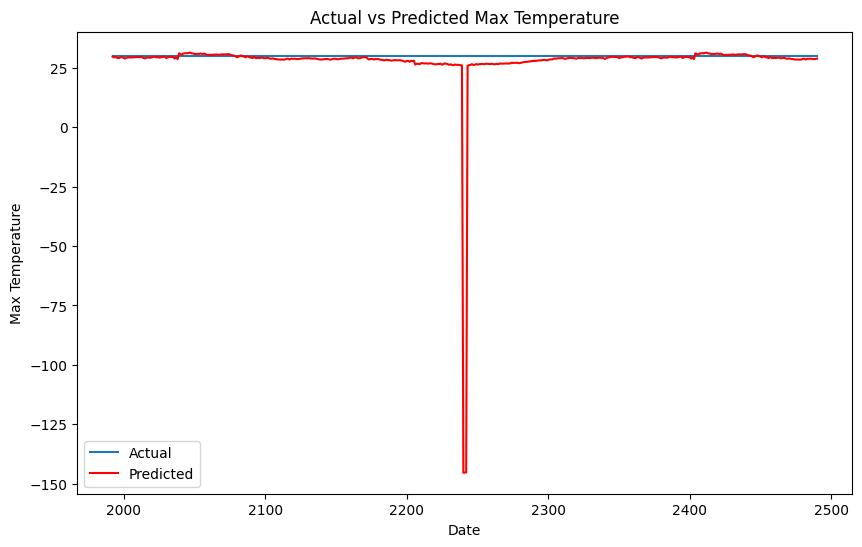

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('/content/Dataset/mumbai_rain.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Handling missing values
# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)
# Interpolate missing values
df.interpolate(method='linear', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['MaxTemp'], label='Max Temperature')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Time Series Plot of Max Temperature')
plt.legend()
plt.show()

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['MaxTemp'][:train_size], df['MaxTemp'][train_size:]

# Choose and fit the model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

# Make predictions
predictions = model.forecast(len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Actual vs Predicted Max Temperature')
plt.legend()
plt.show()
